<a href="https://colab.research.google.com/github/mayankbanodhia/Mayankportfolio/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
df = pd.read_excel('/content/customer_churn_large_dataset (1).xlsx')

In [ ]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [ ]:
df.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [ ]:
df.shape

(100000, 9)

In [ ]:
df = df.dropna()

In [ ]:
print(df.Gender.value_counts())

Female    50216
Male      49784
Name: Gender, dtype: int64


In [ ]:
print(df.Location.value_counts())

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64


In [ ]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
X = df.drop(['Name','Churn'],axis=1)
Y = df['Churn']

In [ ]:
print(Y)

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64


In [ ]:
print(X)

       CustomerID  Age  Gender     Location  Subscription_Length_Months  \
0               1   63    Male  Los Angeles                          17   
1               2   62  Female     New York                           1   
2               3   24  Female  Los Angeles                           5   
3               4   36  Female        Miami                           3   
4               5   46  Female        Miami                          19   
...           ...  ...     ...          ...                         ...   
99995       99996   33    Male      Houston                          23   
99996       99997   62  Female     New York                          19   
99997       99998   64    Male      Chicago                          17   
99998       99999   51  Female     New York                          20   
99999      100000   27  Female  Los Angeles                          19   

       Monthly_Bill  Total_Usage_GB  
0             73.36             236  
1             48.76    

In [ ]:
X=df.sort_values('Monthly_Bill')

In [ ]:
print(X)

       CustomerID            Name  Age  Gender     Location  \
88123       88124  Customer_88124   33    Male      Houston   
64544       64545  Customer_64545   48  Female      Chicago   
25447       25448  Customer_25448   47  Female      Houston   
26182       26183  Customer_26183   25  Female      Chicago   
71273       71274  Customer_71274   57  Female        Miami   
...           ...             ...  ...     ...          ...   
95970       95971  Customer_95971   40    Male      Houston   
73813       73814  Customer_73814   32  Female     New York   
34752       34753  Customer_34753   47    Male      Chicago   
32842       32843  Customer_32843   21    Male  Los Angeles   
36616       36617  Customer_36617   58  Female      Houston   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
88123                          19         30.00              51      1  
64544                          12         30.00             162      0  
25447                   

In [ ]:
a=df.sort_values(["Total_Usage_GB",	"Monthly_Bill"],ascending=[1,1])

In [ ]:
a

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,usage_to_bill_ratio
72057,72058,Customer_72058,38,Female,New York,19,30.26,50,0,1.652346
69034,69035,Customer_69035,70,Male,Chicago,4,30.38,50,1,1.645820
45840,45841,Customer_45841,25,Female,Los Angeles,7,30.40,50,1,1.644737
77973,77974,Customer_77974,40,Female,Houston,8,30.67,50,0,1.630258
39912,39913,Customer_39913,48,Male,Chicago,22,30.74,50,1,1.626545
...,...,...,...,...,...,...,...,...,...,...
58410,58411,Customer_58411,18,Female,Los Angeles,13,98.48,500,1,5.077173
56103,56104,Customer_56104,20,Female,Miami,19,98.81,500,1,5.060217
18107,18108,Customer_18108,37,Female,Los Angeles,14,99.30,500,0,5.035247
34006,34007,Customer_34007,64,Female,Chicago,20,99.77,500,0,5.011527


In [ ]:
a['usage_to_bill_ratio'] = a['Total_Usage_GB'] / a['Monthly_Bill']
df=a
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,usage_to_bill_ratio
72057,72058,Customer_72058,38,Female,New York,19,30.26,50,0,1.652346
69034,69035,Customer_69035,70,Male,Chicago,4,30.38,50,1,1.645820
45840,45841,Customer_45841,25,Female,Los Angeles,7,30.40,50,1,1.644737
77973,77974,Customer_77974,40,Female,Houston,8,30.67,50,0,1.630258
39912,39913,Customer_39913,48,Male,Chicago,22,30.74,50,1,1.626545
...,...,...,...,...,...,...,...,...,...,...
58410,58411,Customer_58411,18,Female,Los Angeles,13,98.48,500,1,5.077173
56103,56104,Customer_56104,20,Female,Miami,19,98.81,500,1,5.060217
18107,18108,Customer_18108,37,Female,Los Angeles,14,99.30,500,0,5.035247
34006,34007,Customer_34007,64,Female,Chicago,20,99.77,500,0,5.011527


In [ ]:
import plotly.subplots as sp
import plotly.graph_objects as go

g_labels = ['Male', 'Female']
c_labels = ['0', '1']
import plotly.subplots as sp
import plotly.graph_objects as go

import plotly.subplots as sp
import plotly.graph_objects as go

g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

# Create subplots: use 'domain' type for Pie subplot
fig = sp.make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=g_labels, values=df['Gender'].value_counts(), name="Gender"), 1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"), 1, 2)

fig.update_layout(title_text="Gender and Churn Distribution")
fig.show()




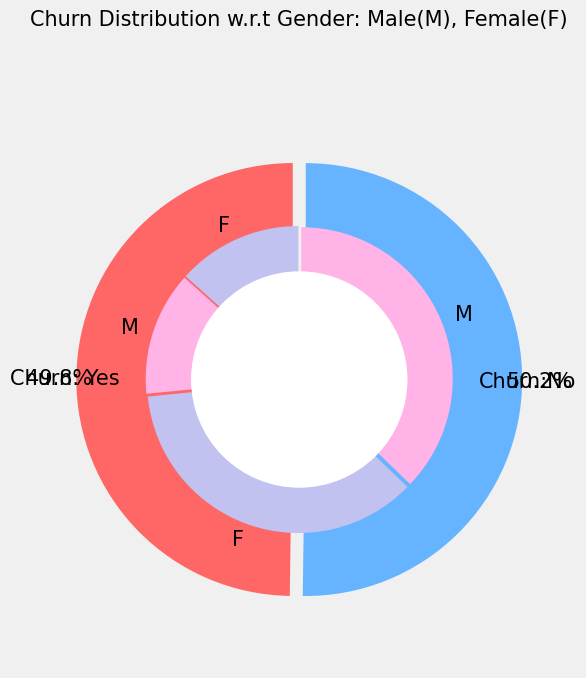

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [49779,50221]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)
# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
print(df.Churn.value_counts())

0    50221
1    49779
Name: Churn, dtype: int64
